# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [81]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
import json
 

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [82]:
# List for holding lat_lngs and cities
lat_lngs=[]
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [83]:
row_count = 0
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
cities_name =[]
cities_country=[]
cities_lat = []
cities_lng = []
cities_temp = []
cities_windspeed = []
cities_humidity = []
cities_cloudiness = []
cities_date = []

    
for index, city in enumerate(cities):
    
    #build query 
    query_url = f"{url}appid={api_key}&q={city}&units={units}"
    
    #print to ensure loop is working correctly

    print("Processing City # " + str(row_count) + " City Name: " + str(city))
    print(query_url)
    row_count += 1
    
 #  #Run requests to grab the JSON at the requested URL
    city_data = requests.get(query_url).json()

    #Append data to lists; use try except to skip cities with errors
    try:
        cities_name.append(city_data['name'])
        cities_country.append(city_data['sys']['country'])
        cities_lat.append(city_data['coord']['lat'])
        cities_lng.append(city_data['coord']['lon'])
        cities_temp.append(city_data["main"]["temp"])
        cities_windspeed.append(city_data["wind"]["speed"]) 
        cities_humidity.append(city_data["main"]["humidity"])
        cities_cloudiness.append(city_data["clouds"]["all"])
        cities_date.append(city_data['dt'])
    except:
        print("Error with data. Skipping")

      

Processing City # 0 City Name: price
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=price&units=imperial
Processing City # 1 City Name: khatanga
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=khatanga&units=imperial
Processing City # 2 City Name: biak
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=biak&units=imperial
Processing City # 3 City Name: marcona
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=marcona&units=imperial
Error with data. Skipping
Processing City # 4 City Name: hithadhoo
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=hithadhoo&units=imperial
Processing City # 5 City Name: lebu
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=lebu&units=imperial
Processing City # 6 City Name: hermanus
http://api.openweathermap.org/data/2.5/weath

Processing City # 53 City Name: taoudenni
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=taoudenni&units=imperial
Processing City # 54 City Name: sterling
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=sterling&units=imperial
Processing City # 55 City Name: faanui
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=faanui&units=imperial
Processing City # 56 City Name: bethel
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=bethel&units=imperial
Processing City # 57 City Name: robertsport
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=robertsport&units=imperial
Processing City # 58 City Name: gusau
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=gusau&units=imperial
Processing City # 59 City Name: mahebourg
http://api.openweathermap.org/data/2.5/weather

Error with data. Skipping
Processing City # 108 City Name: kangaatsiaq
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=kangaatsiaq&units=imperial
Processing City # 109 City Name: westport
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=westport&units=imperial
Processing City # 110 City Name: guerrero negro
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=guerrero negro&units=imperial
Processing City # 111 City Name: santa isabel
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=santa isabel&units=imperial
Processing City # 112 City Name: binuangan
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=binuangan&units=imperial
Processing City # 113 City Name: provost
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=provost&units=imperial
Processing City # 114 Ci

Processing City # 161 City Name: traian
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=traian&units=imperial
Processing City # 162 City Name: pudozh
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=pudozh&units=imperial
Processing City # 163 City Name: kutum
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=kutum&units=imperial
Processing City # 164 City Name: padang
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=padang&units=imperial
Processing City # 165 City Name: kuusamo
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=kuusamo&units=imperial
Processing City # 166 City Name: trapani
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=trapani&units=imperial
Processing City # 167 City Name: jaque
http://api.openweathermap.org/data/2.5/weather?appid=cd1166

Processing City # 215 City Name: huarmey
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=huarmey&units=imperial
Processing City # 216 City Name: letca noua
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=letca noua&units=imperial
Error with data. Skipping
Processing City # 217 City Name: sentyabrskiy
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=sentyabrskiy&units=imperial
Error with data. Skipping
Processing City # 218 City Name: batetskiy
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=batetskiy&units=imperial
Processing City # 219 City Name: rio grande
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=rio grande&units=imperial
Processing City # 220 City Name: antofagasta
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=antofagasta&units=imperial
Pr

Processing City # 268 City Name: tessalit
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=tessalit&units=imperial
Processing City # 269 City Name: nhulunbuy
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=nhulunbuy&units=imperial
Processing City # 270 City Name: monetnyy
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=monetnyy&units=imperial
Processing City # 271 City Name: cairns
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=cairns&units=imperial
Processing City # 272 City Name: ilulissat
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=ilulissat&units=imperial
Processing City # 273 City Name: arlit
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=arlit&units=imperial
Processing City # 274 City Name: neryungri
http://api.openweathermap.org/data/2.5/

Processing City # 320 City Name: vila franca do campo
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=vila franca do campo&units=imperial
Processing City # 321 City Name: fairbanks
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=fairbanks&units=imperial
Processing City # 322 City Name: kristiinankaupunki
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=kristiinankaupunki&units=imperial
Error with data. Skipping
Processing City # 323 City Name: oktyabrskiy
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=oktyabrskiy&units=imperial
Processing City # 324 City Name: tiksi
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=tiksi&units=imperial
Processing City # 325 City Name: bunia
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=bunia&units=imperial
Processing

Processing City # 372 City Name: port lincoln
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=port lincoln&units=imperial
Processing City # 373 City Name: puerto escondido
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=puerto escondido&units=imperial
Processing City # 374 City Name: emirdag
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=emirdag&units=imperial
Processing City # 375 City Name: coquimbo
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=coquimbo&units=imperial
Processing City # 376 City Name: talnakh
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=talnakh&units=imperial
Processing City # 377 City Name: margate
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=margate&units=imperial
Processing City # 378 City Name: benton harbor
http://api.

Processing City # 427 City Name: grindavik
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=grindavik&units=imperial
Processing City # 428 City Name: kalakamati
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=kalakamati&units=imperial
Processing City # 429 City Name: pouebo
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=pouebo&units=imperial
Processing City # 430 City Name: cap malheureux
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=cap malheureux&units=imperial
Processing City # 431 City Name: honningsvag
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=honningsvag&units=imperial
Processing City # 432 City Name: maldonado
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=maldonado&units=imperial
Processing City # 433 City Name: abrau-dyurso
http://a

Processing City # 480 City Name: uruzgan
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=uruzgan&units=imperial
Processing City # 481 City Name: dodge city
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=dodge city&units=imperial
Processing City # 482 City Name: caravelas
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=caravelas&units=imperial
Processing City # 483 City Name: privokzalnyy
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=privokzalnyy&units=imperial
Error with data. Skipping
Processing City # 484 City Name: cuite
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=cuite&units=imperial
Processing City # 485 City Name: kirakira
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=kirakira&units=imperial
Processing City # 486 City Name: clyde river

Error with data. Skipping
Processing City # 533 City Name: karlskoga
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=karlskoga&units=imperial
Processing City # 534 City Name: havre-saint-pierre
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=havre-saint-pierre&units=imperial
Processing City # 535 City Name: stokmarknes
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=stokmarknes&units=imperial
Processing City # 536 City Name: tuatapere
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=tuatapere&units=imperial
Processing City # 537 City Name: kayasula
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=kayasula&units=imperial
Processing City # 538 City Name: vanavara
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=vanavara&units=imperial
Processing City # 53

Processing City # 585 City Name: ketchikan
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=ketchikan&units=imperial
Processing City # 586 City Name: tank
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=tank&units=imperial
Processing City # 587 City Name: hauterive
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=hauterive&units=imperial
Processing City # 588 City Name: sangar
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=sangar&units=imperial
Processing City # 589 City Name: tekkali
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=tekkali&units=imperial
Processing City # 590 City Name: khanpur
http://api.openweathermap.org/data/2.5/weather?appid=cd1166e654293a0b09e9dfae00edca3d&q=khanpur&units=imperial
Processing City # 591 City Name: pavilosta
http://api.openweathermap.org/data/2.5/weathe

In [84]:
# print(json.dumps(city_data, sort_keys=True, indent=4))

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [163]:
weather_dict = {
    "City": cities_name,
    "Country" : cities_country,
    "Latitude": cities_lat, 
    "Longitude": cities_lng, 
    "Max Temp": cities_temp,
    "Wind Speed": cities_windspeed,
    "Humidity": cities_humidity,
    "Cloudiness": cities_cloudiness, 
    "Date": cities_date
}
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,City,Country,Latitude,Longitude,Max Temp,Wind Speed,Humidity,Cloudiness,Date
0,Price,US,39.60,-110.81,71.31,8.05,13,1,1555709511
1,Khatanga,RU,71.98,102.47,-7.33,4.99,95,45,1555709556
2,Biak,ID,-0.91,122.88,65.93,0.67,99,74,1555709556
3,Hithadhoo,MV,-0.60,73.08,85.01,15.23,77,100,1555709323
4,Lebu,ET,8.96,38.73,62.60,4.70,63,20,1555707600


In [164]:
weather_df.to_csv("weather_df.csv", encoding="utf-8", index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

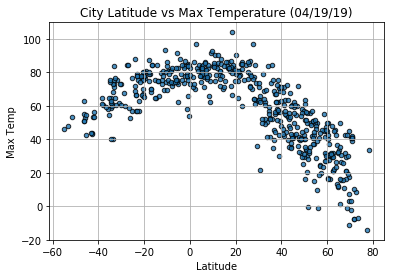

In [171]:
# plt.scatter(weather_df["Lat"], weather_df["Max Temp"], edgecolor="black", linewidths=1, marker="o",
#             alpha=0.8, label="Max Temps")
# plt.title("City Latitude vs Temperature (04/19/19)")
# plt.ylabel("Temperature (F)")
# plt.xlabel("Latitude")
# plt.grid()
# plt.show()

weather_df.plot(kind= "scatter", x= "Latitude", y= "Max Temp", grid=True, linewidths = 1, edgecolor= "black",
                alpha=0.8, title= "City Latitude vs Max Temperature (04/19/19)")

plt.savefig("Images/LatvsTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

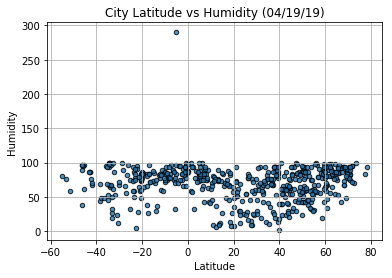

In [172]:
# plt.scatter(weather_df["Lat"],weather_df["Humidity"],edgecolor="black", linewidths=1, marker="o",
#             alpha=0.8, label="Humidity")
# plt.title("City Latitude vs Humidity (04/19/19)")
# plt.ylabel("Humidity %")
# plt.xlabel("Latitude")
# plt.grid = True
# plt.show

weather_df.plot(kind= "scatter", x= "Latitude", y= "Humidity", grid=True, linewidths = 1, edgecolor= "black",
            alpha=0.8, title= "City Latitude vs Humidity (04/19/19)")

plt.savefig("Images/LatvsHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

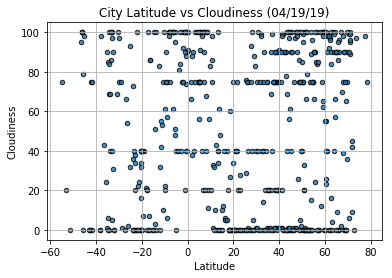

In [173]:
# plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o",
#             alpha=0.8, label="Cloudiness")
# plt.title("City Latitude vs Cloudiness (04/19/19)")
# plt.ylabel("Cloudiness %")
# plt.xlabel("Latitude")
# plt.grid = True
# plt.show

weather_df.plot(kind= "scatter", x= "Latitude", y= "Cloudiness", grid=True, linewidths = 1, edgecolor= "black",
            alpha=0.8, title= "City Latitude vs Cloudiness (04/19/19)")

plt.savefig("Images/LatvsCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

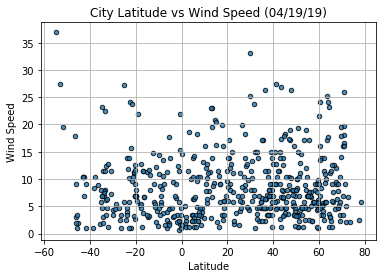

In [174]:
# plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], edgecolor="black",linewidths=1, marker="o",
#             alpha=0.8, label="Windspeed")
# plt.title("City Latitude vs. Wind Speed (04/19/19)")
# plt.ylabel("Wind Speed (mph)")
# plt.xlabel("Latitude")
# plt.grid = True

weather_df.plot(kind= "scatter", x= "Latitude", y= "Wind Speed", grid=True, linewidths = 1, edgecolor= "black",
                alpha=0.8, title= "City Latitude vs Wind Speed (04/19/19)")

plt.savefig("Images/LatvsWindspeed.png")
plt.show()